### Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

### Loading data

In [43]:
combined_df = pd.read_csv('combined_df_2.csv', index_col='Date', parse_dates=True)


In [47]:
combined_df = combined_df[combined_df.index >= "2015-01-01"]


In [53]:
combined_df = combined_df[combined_df.index < "2020-01-01"]


In [55]:
combined_df.head()

,MMM_ao,AOS_ao,ABT_ao,ABBV_ao,ACN_ao,ADBE_ao,AMD_ao,AES_ao,AFL_ao,A_ao,...,WMB_ui,WTW_ui,WDAY_ui,WYNN_ui,XEL_ui,XYL_ui,YUM_ui,ZBRA_ui,ZBH_ui,ZTS_ui
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,2.707703,0.871441,0.643412,-0.343492,3.367598,0.864176,0.016647,0.241945,0.724853,-0.019022,...,12.418626,1.191540,5.567714,13.210882,1.675311,3.609367,7.204330,1.616565,2.263319,4.710402
2015-01-05,2.022114,0.715865,0.477795,-0.607662,2.654005,0.296059,0.017382,0.160717,0.543059,-0.213318,...,11.154469,1.074124,4.894453,12.378045,1.984673,3.814786,7.022733,1.417239,2.101032,4.374722
2015-01-06,1.164509,0.518259,0.285145,-0.914268,1.955145,-0.343795,0.010853,0.010335,0.310285,-0.498240,...,9.602732,1.233841,4.796406,11.503618,2.128802,4.103653,6.635618,1.439741,1.808793,4.054476
2015-01-07,0.372254,0.347276,0.082171,-1.042470,1.450926,-0.842471,-0.001529,-0.134194,0.110970,-0.765068,...,7.681239,1.187660,4.376324,10.078834,2.171596,4.281277,5.838084,1.266449,1.101897,3.274566
2015-01-08,-0.110705,0.250113,0.020241,-0.874122,1.258390,-1.141913,-0.012323,-0.213969,-0.032767,-0.889380,...,6.829794,1.190952,3.994041,8.211162,2.207091,4.520780,5.203679,1.227400,0.845395,2.369288


In [57]:
combined_df.tail()

,MMM_ao,AOS_ao,ABT_ao,ABBV_ao,ACN_ao,ADBE_ao,AMD_ao,AES_ao,AFL_ao,A_ao,...,WMB_ui,WTW_ui,WDAY_ui,WYNN_ui,XEL_ui,XYL_ui,YUM_ui,ZBRA_ui,ZBH_ui,ZTS_ui
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,2.713368,-1.062953,2.020692,2.031375,8.345473,21.815061,4.241294,0.714564,-0.452967,3.901803,...,1.390118,0.911826,8.631005,2.058919,0.729053,1.807383,1.316141,1.228561,0.830433,0.423194
2019-12-26,3.585216,-0.817313,1.953062,1.902358,8.973479,21.757766,4.699911,0.792804,-0.513975,3.940462,...,0.919244,0.967076,8.175090,1.652003,0.830330,1.469584,1.185928,1.235945,0.828669,0.163602
2019-12-27,4.305524,-0.601349,1.926837,1.790390,9.643215,21.592383,5.100147,0.824410,-0.508668,3.921715,...,0.568238,1.081257,7.928912,1.591007,0.867710,1.147962,1.073304,1.258261,0.846972,0.159300
2019-12-30,4.667757,-0.447410,1.694534,1.409011,8.955716,20.495855,5.162765,0.805629,-0.565012,3.739209,...,0.975621,1.146718,7.579585,1.422373,0.870101,0.727467,1.029513,1.289728,0.877387,0.218963
2019-12-31,4.265992,-0.266388,1.569650,1.062477,8.423174,19.310413,4.985735,0.775307,-0.535162,3.508903,...,0.988886,1.186788,7.186350,1.100364,0.863993,0.384593,1.004956,1.322736,0.686841,0.283773


In [59]:
returns_df = pd.read_csv('returns_df.csv', index_col='Date', parse_dates=True)

In [61]:
returns_df.shape

(2516, 503)

In [63]:
returns_df = returns_df[returns_df.index >= "2015-01-01"]


In [65]:
returns_df.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.022553,-0.017497,0.000223,-0.018819,-0.016884,-0.004976,-0.003745,-0.028467,-0.026195,-0.018737,...,-0.039584,-0.007183,-0.004975,-0.017020,-0.011351,-0.062237,-0.020317,-0.014077,0.037303,-0.006003
2015-01-06,-0.010664,-0.008178,-0.011356,-0.004950,-0.007213,-0.020145,-0.011278,-0.022539,-0.008910,-0.015578,...,-0.013585,-0.004974,-0.007374,-0.021331,0.005320,-0.005881,-0.012274,-0.007205,-0.008477,-0.009756
2015-01-07,0.007249,0.007329,0.008108,0.040416,0.020989,0.008223,-0.019011,0.001537,0.006276,0.013272,...,-0.005369,0.014315,-0.000881,0.029368,0.008635,0.007887,0.033138,0.025465,0.024871,0.020643
2015-01-08,0.023968,0.026010,0.020554,0.010459,0.015249,0.025453,0.011628,0.015349,0.009778,0.029975,...,0.009622,0.011425,0.043226,0.012031,0.011599,0.007546,0.017420,0.021359,0.010617,0.015399


In [67]:
returns_df = returns_df[returns_df.index < "2020-01-01"]


In [69]:
returns_df.shape

(1258, 503)

In [71]:
combined_df.shape

(1258, 36216)

### Reformating data

In [79]:
returns_df = returns_df.rename(columns=lambda x: f"{x}_return")


In [75]:
############################
#  A. Parse signals_df columns
############################
new_cols_signals = []
for c in combined_df.columns:
    # Each column is like "AAPL_ao", "AAPL_rsi", etc.
    ticker, indicator = c.split('_', 1)
    new_cols_signals.append((ticker, indicator))

# Create a MultiIndex with levels = [ticker, indicator]
combined_df.columns = pd.MultiIndex.from_tuples(new_cols_signals, 
                                               names=['ticker', 'indicator'])

In [81]:
############################
#  B. Parse returns_df columns
############################
new_cols_returns = []
for c in returns_df.columns:
    # Each column is like "AAPL_return", "MSFT_return", etc.
    ticker, ret_label = c.split('_', 1)
    # We'll store (ticker, 'return') so it's consistent
    new_cols_returns.append((ticker, 'return'))

returns_df.columns = pd.MultiIndex.from_tuples(new_cols_returns, 
                                               names=['ticker', 'field'])

### Cross sectional analysis

In [98]:


############################
#  C. Improved data preparation
############################
# First, handle missing data in combined_df
# Fill NaN values with column means for each ticker
combined_df_filled = combined_df.groupby(level='ticker', axis=1).transform(
    lambda x: x.fillna(x.mean())
)

# Fill any remaining NaNs with 0 (for columns that are all NaN for a ticker)
combined_df_filled = combined_df_filled.fillna(0)

# Now stack the data
signals_long = combined_df_filled.stack(level='ticker')
signals_long.index = signals_long.index.set_names(["date", "ticker"])

# For returns_df, we'll be more conservative and only fill within each ticker
# First create a DataFrame with the same structure as returns_df
returns_df_filled = returns_df.copy()

# Fill forward and then backward within each ticker to handle missing days
for ticker in returns_df.columns.get_level_values('ticker').unique():
    ticker_cols = [col for col in returns_df.columns if col[0] == ticker]
    returns_df_filled[ticker_cols] = returns_df[ticker_cols].fillna(method='ffill').fillna(method='bfill')

# Stack the returns data
returns_long = returns_df_filled.stack(level='ticker')
returns_long.index = returns_long.index.set_names(["date", "ticker"])

# Join the dataframes
df_merged = signals_long.join(returns_long, how="inner")

# Print shape information for debugging
print(f"After preprocessing and joining:")
print(f"signals_long shape: {signals_long.shape}")
print(f"returns_long shape: {returns_long.shape}")
print(f"df_merged shape: {df_merged.shape}")

############################
#  D. Improved regression with diagnostic checks
############################
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

coefs_list = []
dates_list = []
stats_list = []  # To store regression statistics
feature_counts = []  # To track how many features are used in each regression

# Calculate min number of stocks needed for regression
all_dates = df_merged.index.get_level_values('date').unique()
min_stocks = max(10, int(len(df_merged.index.get_level_values('ticker').unique()) * 0.05))  # At least 5% of all stocks

print(f"Total unique dates: {len(all_dates)}")
print(f"Minimum stocks required per regression: {min_stocks}")

# Add a diagnostic function to check your data
def check_data_quality(date, group):
    """Check data quality and report issues"""
    # Check for missing values
    missing_pct = group.isna().mean() * 100
    high_missing = missing_pct[missing_pct > 50].index.tolist()
    
    # Check for zero variance
    var = group.var()
    zero_var = var[var == 0].index.tolist()
    
    # Count of non-zero, non-NaN values
    valid_counts = (group != 0).sum() - group.isna().sum()
    sparse_cols = valid_counts[valid_counts < len(group) * 0.1].index.tolist()
    
    print(f"\nData quality for {date}:")
    print(f"- Total rows: {len(group)}")
    print(f"- Columns with >50% missing: {len(high_missing)}")
    print(f"- Columns with zero variance: {len(zero_var)}")
    print(f"- Sparse columns (<10% valid): {len(sparse_cols)}")
    
    return high_missing, zero_var, sparse_cols

# Sample a few dates to check data quality
sample_dates = list(np.random.choice(all_dates, min(5, len(all_dates)), replace=False))
print(f"\nChecking data quality for {len(sample_dates)} sample dates")

for date in sample_dates:
    group = df_merged.loc[df_merged.index.get_level_values('date') == date].droplevel('date')
    check_data_quality(date, group)

# Group by date and run regressions
progress_step = max(1, len(all_dates) // 20)  # Show progress every 5%
skipped_dates = 0
vif_filtered_dates = 0
max_vif_threshold = 15  # Increased from 10
total_features_before_vif = 0
total_features_after_vif = 0

for i, (date, group) in enumerate(df_merged.groupby(level='date')):
    # Display progress
    if i % progress_step == 0:
        print(f"Processing date {i+1}/{len(all_dates)} ({(i+1)/len(all_dates)*100:.1f}%)")
    
    # Drop the date level from the index
    group = group.droplevel('date')
    
    # Make sure 'return' column exists
    if 'return' not in group.columns:
        skipped_dates += 1
        if i % progress_step == 0:
            print(f"  Skipping date {date}: No return column")
        continue
    
    # Handle outliers in returns - winsorize at 1% and 99%
    q1 = group['return'].quantile(0.01)
    q99 = group['return'].quantile(0.99)
    group['return'] = group['return'].clip(q1, q99)
    
    # Check if we have sufficient data points (now using our dynamic threshold)
    if group.shape[0] < min_stocks:
        skipped_dates += 1
        if i % progress_step == 0:
            print(f"  Skipping date {date}: Only {group.shape[0]} stocks (need {min_stocks})")
        continue
    
    # Extract target variable
    y = group['return']
    
    # Extract features, but first check for columns that are all NaN or constant
    X = group.drop(columns=['return'])
    
    # Remove columns with all NaN or constant values
    null_cols = X.columns[X.isna().all()].tolist()
    const_cols = X.columns[X.nunique() <= 1].tolist()
    
    if null_cols or const_cols:
        if i % progress_step == 0:
            print(f"  Dropping {len(null_cols)} all-NaN columns and {len(const_cols)} constant columns")
        X = X.drop(columns=null_cols + const_cols)
    
    # If no features remain, skip this date
    if X.shape[1] == 0:
        skipped_dates += 1
        if i % progress_step == 0:
            print(f"  Skipping date {date}: No valid features remain")
        continue
    
    # Normalize features (subtract mean, divide by std)
    X = (X - X.mean()) / X.std().replace(0, 1)  # Replace zero std with 1 to avoid division by zero
    
    # Remove any residual NaNs from normalization
    valid_rows = ~y.isna() & ~X.isna().any(axis=1)
    if valid_rows.sum() < min_stocks:
        skipped_dates += 1
        if i % progress_step == 0:
            print(f"  Skipping date {date}: Only {valid_rows.sum()} valid rows after NaN removal")
        continue
    
    y = y[valid_rows]
    X = X[valid_rows]
    
    # Record features before VIF filtering
    features_before_vif = X.shape[1]
    total_features_before_vif += features_before_vif
    
    # Check for multicollinearity using VIF 
    # Only if we have enough observations and multiple features
    if X.shape[1] > 1 and X.shape[0] > X.shape[1] + 5:  # Need more observations than features
        try:
            from statsmodels.stats.outliers_influence import variance_inflation_factor
            
            # Add constant for VIF calculation
            X_with_const = sm.add_constant(X)
            
            # Calculate VIF for each feature (skip the constant)
            vif_data = pd.DataFrame()
            vif_data["feature"] = X.columns
            vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) 
                              for i in range(X.shape[1])]
            
            # Sort by VIF value to identify worst offenders
            vif_data = vif_data.sort_values("VIF", ascending=False)
            
            # Only remove the highest VIF features if we have sufficient features
            high_vif_features = []
            if X.shape[1] > 10:  # If we have more than 10 features
                # Approach 1: Fixed threshold but higher
                high_vif_features = vif_data[vif_data["VIF"] > max_vif_threshold]["feature"].tolist()
                
                # Approach 2: Alternative - remove only top 20% of high VIF features
                if len(high_vif_features) > X.shape[1] * 0.8:  # Would remove >80% of features
                    # Switch to percentage-based approach
                    cutoff_idx = max(1, int(X.shape[1] * 0.2))  # Remove at most 20% of features
                    high_vif_features = vif_data["feature"].iloc[:cutoff_idx].tolist()
                
                if high_vif_features:
                    if i % progress_step == 0:
                        print(f"  Removing {len(high_vif_features)} high VIF features out of {X.shape[1]}")
                    X = X.drop(columns=high_vif_features)
                    vif_filtered_dates += 1
            
        except Exception as e:
            if i % progress_step == 0:
                print(f"  VIF calculation error on date {date}: {e}")
    
    # Record features after VIF filtering
    features_after_vif = X.shape[1]
    total_features_after_vif += features_after_vif
    feature_counts.append({'date': date, 'before_vif': features_before_vif, 'after_vif': features_after_vif})
    
    # Add the constant term after all the filtering
    X = sm.add_constant(X)
    
    # Check if we still have features besides the constant
    if X.shape[1] <= 1:
        skipped_dates += 1
        if i % progress_step == 0:
            print(f"  Skipping date {date}: No features remain after filtering")
        continue
    
    try:
        model = sm.OLS(y, X).fit()
        coefs_list.append(model.params)
        dates_list.append(date)
        
        # Store regression statistics
        stats_list.append({
            'date': date,
            'n_stocks': len(y),
            'r_squared': model.rsquared,
            'adj_r_squared': model.rsquared_adj,
            'n_features': X.shape[1] - 1  # Excluding constant
        })
        
    except Exception as e:
        skipped_dates += 1
        if i % progress_step == 0:
            print(f"  Regression error on date {date}: {e}")
        continue

# Check if we have any successful regressions
if not coefs_list:
    print("No successful regressions were performed. Check your data.")
else:
    # Combine the daily regression coefficients
    coefs_df = pd.DataFrame(coefs_list, index=dates_list)
    
    # Create a dataframe of regression statistics
    regression_stats = pd.DataFrame(stats_list)
    regression_stats.set_index('date', inplace=True)
    
    # Create a dataframe to track feature counts
    feature_counts_df = pd.DataFrame(feature_counts)
    feature_counts_df.set_index('date', inplace=True)
    
    print(f"\nRegression Summary:")
    print(f"Total dates analyzed: {len(all_dates)}")
    print(f"Successfully ran {len(coefs_list)} daily regressions")
    print(f"Skipped {skipped_dates} dates due to data issues")
    print(f"Applied VIF filtering on {vif_filtered_dates} dates")
    print(f"Average features before VIF: {total_features_before_vif / len(dates_list):.2f}")
    print(f"Average features after VIF: {total_features_after_vif / len(dates_list):.2f}")
    print(f"Coefficients dataframe shape: {coefs_df.shape}")
    print(f"Average R-squared: {regression_stats['r_squared'].mean():.4f}")
    print(f"Average adjusted R-squared: {regression_stats['adj_r_squared'].mean():.4f}")
    print(f"Average number of features used: {regression_stats['n_features'].mean():.2f}")
    
    # Calculate Fama-MacBeth statistics
    mean_coefs = coefs_df.mean()
    std_coefs = coefs_df.std()
    T = coefs_df.shape[0]
    
    # Calculate t-stats
    t_stats = mean_coefs / (std_coefs / np.sqrt(T))
    
    # Calculate p-values
    p_values = 2 * (1 - abs(t_stats).apply(lambda t: min(0.9999, stats.t.cdf(abs(t), df=T-1))))
    
    results = pd.DataFrame({
        'Mean': mean_coefs,
        'Std': std_coefs,
        'T-Stat': t_stats,
        'P-value': p_values,
        'Significant': p_values < 0.05
    })
    
    print("\nFama–MacBeth Regression Results:")
    # Sort by statistical significance (p-value)
    print(results.sort_values('P-value'))
    
    # Check how frequently each factor appears in the daily regressions
    factor_frequency = (coefs_df.count() / len(coefs_df) * 100).sort_values(ascending=False)
    print("\nFactor inclusion frequency (% of regressions):")
    print(factor_frequency)
    
    # Output the most significant factors
    print("\nTop 10 Most Significant Factors:")
    print(results.sort_values('P-value').head(10))

C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_18712\4219080222.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_df_filled = combined_df.groupby(level='ticker', axis=1).transform(
C:\Users\PushkarJain\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_18712\4219080222.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  signals_long = combined_df_filled.stack(level='ticker')
C:\Users\PushkarJain\AppData\Local\Temp\ipykernel_18712\4219080222.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

After preprocessing and joining:
signals_long shape: (632774, 72)
returns_long shape: (617678, 1)
df_merged shape: (617678, 73)
Total unique dates: 1258
Minimum stocks required per regression: 24

Checking data quality for 5 sample dates

Data quality for 2018-12-21T00:00:00.000000000:
- Total rows: 491
- Columns with >50% missing: 0
- Columns with zero variance: 0
- Sparse columns (<10% valid): 1

Data quality for 2015-06-16T00:00:00.000000000:
- Total rows: 491
- Columns with >50% missing: 0
- Columns with zero variance: 0
- Sparse columns (<10% valid): 0

Data quality for 2015-09-02T00:00:00.000000000:
- Total rows: 491
- Columns with >50% missing: 0
- Columns with zero variance: 0
- Sparse columns (<10% valid): 2

Data quality for 2015-09-10T00:00:00.000000000:
- Total rows: 491
- Columns with >50% missing: 0
- Columns with zero variance: 0
- Sparse columns (<10% valid): 0

Data quality for 2017-02-15T00:00:00.000000000:
- Total rows: 491
- Columns with >50% missing: 0
- Columns wi

C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 63/1258 (5.0%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 125/1258 (9.9%)
  Skipping date 2015-07-01 00:00:00: Only 0 valid rows after NaN removal


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 187/1258 (14.9%)
  Skipping date 2015-09-29 00:00:00: Only 0 valid rows after NaN removal


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 249/1258 (19.8%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 311/1258 (24.7%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 373/1258 (29.7%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 435/1258 (34.6%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 497/1258 (39.5%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 559/1258 (44.4%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 621/1258 (49.4%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 683/1258 (54.3%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 745/1258 (59.2%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 807/1258 (64.1%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 869/1258 (69.1%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 931/1258 (74.0%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 993/1258 (78.9%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 1055/1258 (83.9%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 1117/1258 (88.8%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 1179/1258 (93.7%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out

Processing date 1241/1258 (98.6%)


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


  Removing 14 high VIF features out of 72


C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\PushkarJain\anaconda3\Lib\site-packages\statsmodels\stats\out


Regression Summary:
Total dates analyzed: 1258
Successfully ran 991 daily regressions
Skipped 267 dates due to data issues
Applied VIF filtering on 991 dates
Average features before VIF: 72.00
Average features after VIF: 58.00
Coefficients dataframe shape: (991, 73)
Average R-squared: 0.8016
Average adjusted R-squared: 0.7749
Average number of features used: 58.00

Fama–MacBeth Regression Results:
                 Mean          Std     T-Stat   P-value  Significant
psl         -0.000623     0.001319 -14.866117  0.000200         True
amat        -0.001183     0.000577 -64.561399  0.000200         True
ttm_trend    0.000148     0.000534   8.715225  0.000200         True
vortex    -440.098391  3636.204305  -3.810117  0.000200         True
atr        622.501481  3914.312511   5.006356  0.000200         True
...               ...          ...        ...       ...          ...
nvi         -0.000008     0.000496  -0.504778  0.613827        False
chop        -0.127930    10.052987  -0.400604 

In [102]:
market_returns = pd.read_csv('market_returns.csv', index_col='Date', parse_dates=True)


In [106]:
market_returns = market_returns[market_returns.index >= "2015-01-01"]


In [108]:
market_returns = market_returns[market_returns.index < "2020-01-01"]


In [110]:
market_returns.shape

(1258, 3)

In [112]:
market_returns = market_returns.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
market_returns.head()

,Market_Returns
Date,
2015-01-02,-0.000340
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888


### Time series analysis

In [114]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def select_top_indicators(results_df, n=20):
    """
    Select the top n indicators based on statistical significance from Fama-MacBeth results.
    
    Parameters:
    results_df: DataFrame with Fama-MacBeth regression results
    n: Number of top indicators to select
    
    Returns:
    List of top indicator names
    """
    # Sort by absolute t-statistic (higher = more significant)
    # Alternatively, can sort by p-value (lower = more significant)
    if 'P-value' in results_df.columns:
        sorted_indicators = results_df.sort_values('P-value').index
    else:
        sorted_indicators = results_df.sort_values('T-Stat', key=abs, ascending=False).index
    
    # Filter out the constant term if present
    sorted_indicators = [x for x in sorted_indicators if x != 'const']
    
    # Return top n indicators
    return sorted_indicators[:n]

def run_time_series_for_top_indicators(combined_df, returns_df, market_returns_df, fama_macbeth_results, top_n=20):
    """
    Run time-series regressions for each stock using only the top significant indicators
    from Fama-MacBeth analysis.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)
    market_returns_df: DataFrame with market returns
    fama_macbeth_results: DataFrame with Fama-MacBeth regression results
    top_n: Number of top indicators to analyze
    
    Returns:
    Dictionary of DataFrames with analysis results
    """
    print(f"Selecting top {top_n} indicators from Fama-MacBeth results...")
    
    # Select top indicators
    top_indicators = select_top_indicators(fama_macbeth_results, n=top_n)
    print(f"Top {top_n} indicators selected: {', '.join(top_indicators[:5])}...")
    
    # Get unique tickers
    tickers = combined_df.columns.get_level_values('ticker').unique()
    print(f"Found {len(tickers)} tickers for analysis")
    
    # Initialize result dataframes
    p_values = pd.DataFrame(index=tickers, columns=top_indicators)
    t_stats = pd.DataFrame(index=tickers, columns=top_indicators)
    betas = pd.DataFrame(index=tickers, columns=top_indicators)
    r_squared = pd.DataFrame(index=tickers, columns=top_indicators)
    
    # Make sure market returns is properly formatted
    market_returns = market_returns_df['Market_Returns']
    
    print("Running time-series regressions for each stock and selected indicator...")
    
    # Iterate through each ticker
    for ticker in tqdm(tickers):
        # Get returns for this ticker
        try:
            ticker_returns = returns_df.xs(ticker, axis=1, level='ticker')
            
            # Skip if returns are missing
            if ticker_returns.empty or ticker_returns.iloc[:, 0].isna().all():
                continue
                
            # Rename column to 'return' for clarity
            ticker_returns.columns = ['return']
            
            # Merge with market returns
            ticker_data = ticker_returns.join(market_returns, how='inner')
            
            # Skip if not enough data points after joining
            if ticker_data.shape[0] < 252:  # Require at least 1 year of data
                continue
        except Exception as e:
            print(f"Error processing returns for {ticker}: {e}")
            continue
            
        # Run regression for each top indicator
        for indicator in top_indicators:
            try:
                # Get signal data for this ticker and indicator
                try:
                    signal_values = combined_df.xs((ticker, indicator), axis=1)
                except KeyError:
                    # Skip if this ticker doesn't have this indicator
                    continue
                
                # Skip if signal values are missing
                if signal_values.isna().all():
                    continue
                
                # Merge signal with returns data
                regression_data = ticker_data.copy()
                regression_data[indicator] = signal_values
                
                # Skip if not enough data after joining
                if regression_data.shape[0] < 252:
                    continue
                
                # Normalize the signal (z-score normalization)
                signal_mean = regression_data[indicator].mean()
                signal_std = regression_data[indicator].std()
                
                # Skip if signal has no variation
                if signal_std == 0:
                    continue
                    
                regression_data[indicator] = (regression_data[indicator] - signal_mean) / signal_std
                
                # Drop rows with NaN
                regression_data = regression_data.dropna()
                
                # Prepare regression variables
                y = regression_data['return']
                X = regression_data[['Market_Returns', indicator]]
                X = sm.add_constant(X)
                
                # Run regression
                model = sm.OLS(y, X).fit()
                
                # Store results
                p_values.loc[ticker, indicator] = model.pvalues[indicator]
                t_stats.loc[ticker, indicator] = model.tvalues[indicator]
                betas.loc[ticker, indicator] = model.params[indicator]
                r_squared.loc[ticker, indicator] = model.rsquared
                
            except Exception as e:
                # print(f"Error in regression for {ticker}, {indicator}: {e}")
                continue
    
    print("Time series regression analysis complete!")
    
    # Summarize results
    significant_counts = (p_values < 0.05).sum()
    print("\nNumber of stocks with significant signals (p < 0.05):")
    print(significant_counts.sort_values(ascending=False))
    
    # Calculate additional summary statistics
    summary_stats = pd.DataFrame({
        'Significant_Count': significant_counts,
        'Significant_Percent': (significant_counts / p_values.count()) * 100,
        'Positive_Effect': (betas > 0).sum(),
        'Negative_Effect': (betas < 0).sum(),
        'Avg_R_Squared': r_squared.mean(),
        'Avg_Beta': betas.mean()
    })
    
    summary_stats = summary_stats.sort_values('Significant_Percent', ascending=False)
    print("\nSummary statistics:")
    print(summary_stats)
    
    # Return all results
    results = {
        'p_values': p_values,
        't_stats': t_stats,
        'betas': betas,
        'r_squared': r_squared,
        'significant_counts': significant_counts,
        'summary_stats': summary_stats,
        'top_indicators': top_indicators
    }
    
    return results


In [116]:
# Run the analysis with your existing dataframes
time_series_results = run_time_series_for_top_indicators(
    combined_df,           # Your signals dataframe
    returns_df,            # Your returns dataframe
    market_returns,     # Your market returns with 'Market_Returns' column
    results,  # Results from your Fama-MacBeth regression
    top_n=20               # Number of top indicators to analyze
)

# Get the p-values matrix (tickers as rows, signals as columns)
p_values_matrix = time_series_results['p_values']

# Save key results to CSV
p_values_matrix.to_csv('top_signals_pvalues_by_stock.csv')
time_series_results['summary_stats'].to_csv('top_signals_summary_stats.csv')

Selecting top 20 indicators from Fama-MacBeth results...
Top 20 indicators selected: psl, amat, ttm_trend, vortex, atr...
Found 503 tickers for analysis
Running time-series regressions for each stock and selected indicator...


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [01:01<00:00,  8.17it/s]


Time series regression analysis complete!

Number of stocks with significant signals (p < 0.05):
rvi           491
amat          491
eri           491
cfo           491
dpo           491
slope         491
ttm_trend     490
efi           490
psl           488
adosc         483
vortex        482
true_range    302
inertia       278
natr          201
rsx           198
pvo           133
stc            54
kc             53
atr            47
decay           1
dtype: int64

Summary statistics:
            Significant_Count  Significant_Percent  Positive_Effect  \
rvi                       491           100.000000              491   
amat                      491           100.000000              491   
eri                       491           100.000000              491   
cfo                       491           100.000000              491   
dpo                       491           100.000000              491   
slope                     491           100.000000              491   
ttm_trend   

### Lasso Regression

In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from tqdm import tqdm

def categorize_signals(signals_list):
    """
    Categorize signals based on the provided mapping.
    
    Returns:
    Dictionary mapping categories to lists of signals in that category
    """
    # Define categories based on the provided information
    categories = {
        'trend': ['amat', 'dpo', 'ttm_trend', 'vortex', 'decay'],
        'momentum': ['eri', 'cfo', 'slope', 'psl', 'inertia','rsx','pvo','stc'],
        'volume': ['efi', 'adosc', 'pvol'],
        'volatility': ['true_range', 'rvi','natr','kc','atr']
    }
    
    # Create a reverse mapping from signal to category
    signal_to_category = {}
    for category, signals in categories.items():
        for signal in signals:
            signal_to_category[signal] = category
    
    # Organize all provided signals by category
    categorized = defaultdict(list)
    for signal in signals_list:
        # Extract the base signal name from the full indicator name (in case they have suffixes)
        base_signal = None
        for signal_key in signal_to_category.keys():
            if signal_key in signal.lower():
                base_signal = signal_key
                break
        
        if base_signal:
            category = signal_to_category[base_signal]
            categorized[category].append(signal)
        else:
            # If no category found, put in 'other'
            categorized['other'].append(signal)
    
    return categorized

def run_lasso_by_category(combined_df, returns_df, time_series_results, top_n=20):
    """
    Run LASSO regression for each category of signals to select the most significant ones.
    
    Parameters:
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    returns_df: DataFrame with MultiIndex columns (ticker, field)
    time_series_results: Results from previous time series analysis
    top_n: Number of top indicators to analyze
    
    Returns:
    Dictionary with results by category
    """
    print("Extracting top indicators from time series results...")
    
    # Extract the top indicators from the summary statistics
    summary_stats = time_series_results['summary_stats']
    top_indicators = summary_stats.index.tolist()[:top_n]
    
    print(f"Selected top {len(top_indicators)} indicators: {', '.join(top_indicators)}")
    
    print("Organizing signals by category...")
    # Categorize the signals
    categorized_signals = categorize_signals(top_indicators)
    
    for category, signals in categorized_signals.items():
        print(f"Category '{category}' has {len(signals)} signals: {', '.join(signals)}")
    
    # Get unique tickers
    tickers = combined_df.columns.get_level_values('ticker').unique()
    print(f"Found {len(tickers)} tickers for analysis")
    
    # Initialize results
    results = {}
    
    # For each category, run LASSO regression
    for category, signals in categorized_signals.items():
        print(f"\nProcessing category: {category}")
        
        if len(signals) <= 1:
            print(f"Skipping category {category} - only has {len(signals)} signal(s)")
            continue
            
        # Store coefficients for this category
        coef_matrix = pd.DataFrame(index=tickers, columns=signals)
        r2_scores = pd.Series(index=tickers)
        
        # Process each ticker
        for ticker in tqdm(tickers):
            try:
                # Get returns for this ticker
                ticker_returns = returns_df.xs(ticker, axis=1, level='ticker')
                
                # Skip if returns are missing
                if ticker_returns.empty or ticker_returns.iloc[:, 0].isna().all():
                    continue
                    
                # Rename column to 'return' for clarity
                ticker_returns.columns = ['return']
                
                # Collect signal data for this ticker
                signal_data = pd.DataFrame(index=ticker_returns.index)
                
                for signal in signals:
                    try:
                        # Get signal values
                        signal_values = combined_df.xs((ticker, signal), axis=1)
                        signal_data[signal] = signal_values
                    except KeyError:
                        # This ticker might not have all signals
                        continue
                
                # Join with returns
                regression_data = ticker_returns.join(signal_data, how='inner')
                
                # Skip if not enough data
                if regression_data.shape[0] < 252 or regression_data.shape[1] <= 1:
                    continue
                
                # Drop rows with NaN values
                regression_data = regression_data.dropna()
                
                # Skip if we don't have enough data after NaN removal
                if regression_data.shape[0] < 252:
                    continue
                
                # Prepare data for LASSO
                y = regression_data['return']
                X = regression_data[signals].copy()
                
                # Standardize features (important for LASSO)
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X)
                X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
                
                # Run LASSO with cross-validation
                time_cv = TimeSeriesSplit(n_splits=5)
                lasso_cv = LassoCV(cv=time_cv, max_iter=10000, random_state=42)
                
                lasso_cv.fit(X_scaled, y)
                
                # Store coefficients and R² score
                for signal in signals:
                    if signal in X.columns:
                        idx = list(X.columns).index(signal)
                        coef_matrix.loc[ticker, signal] = lasso_cv.coef_[idx]
                
                r2_scores[ticker] = lasso_cv.score(X_scaled, y)
                
            except Exception as e:
                print(f"Error in LASSO for {ticker} in category {category}: {e}")
                continue
        
        # Summarize results for this category
        coef_counts = (coef_matrix != 0).sum()
        signal_importance = pd.DataFrame({
            'Non_Zero_Count': coef_counts,
            'Non_Zero_Percent': (coef_counts / coef_matrix.count()) * 100,
            'Avg_Coefficient': coef_matrix.mean(),
            'Avg_Abs_Coefficient': coef_matrix.abs().mean()
        })
        
        signal_importance = signal_importance.sort_values('Avg_Abs_Coefficient', ascending=False)
        
        # Store results for this category
        results[category] = {
            'coefficients': coef_matrix,
            'r2_scores': r2_scores,
            'summary': signal_importance
        }
        
        print(f"\nLASSO summary for category '{category}':")
        print(signal_importance)
        
        # Determine the most important signals in this category
        if not signal_importance.empty:
            top_in_category = signal_importance.sort_values('Avg_Abs_Coefficient', ascending=False).index[0]
            print(f"Most important signal in '{category}' category: {top_in_category}")
    
    # Create overall ranking of signals by importance
    all_summaries = []
    for category, result in results.items():
        if category != 'overall_ranking' and category != 'best_per_category':
            summary = result['summary'].copy()
            summary['Category'] = category
            all_summaries.append(summary)
    
    if all_summaries:
        overall_ranking = pd.concat(all_summaries)
        overall_ranking = overall_ranking.sort_values('Avg_Abs_Coefficient', ascending=False)
        
        print("\nOverall signal ranking across categories:")
        print(overall_ranking[['Category', 'Non_Zero_Percent', 'Avg_Abs_Coefficient']].head(10))
        
        # Add overall ranking to results
        results['overall_ranking'] = overall_ranking
        
        # Create a dictionary of best signals per category
        best_per_category = {}
        for category, result in results.items():
            if category != 'overall_ranking' and category != 'best_per_category':
                if not result['summary'].empty:
                    best_signal = result['summary'].sort_values('Avg_Abs_Coefficient', ascending=False).index[0]
                    best_per_category[category] = best_signal
        
        results['best_per_category'] = best_per_category
        
        print("\nBest signal per category:")
        for category, signal in best_per_category.items():
            print(f"{category}: {signal}")
    else:
        print("No valid category results to create overall ranking")
        results['overall_ranking'] = pd.DataFrame()
        results['best_per_category'] = {}
        
    return results

def plot_lasso_results(lasso_results, combined_df):
    """
    Plot visualizations of LASSO regression results.
    
    Parameters:
    lasso_results: Dictionary with LASSO regression results
    combined_df: DataFrame with MultiIndex columns (ticker, indicator)
    """
    # 1. Bar chart of best signals per category
    plt.figure(figsize=(12, 8))
    
    categories = []
    signals = []
    importances = []
    
    for category, result in lasso_results.items():
        if category not in ['overall_ranking', 'best_per_category']:
            summary = result['summary']
            for signal in summary.index:
                categories.append(category)
                signals.append(signal)
                importances.append(summary.loc[signal, 'Avg_Abs_Coefficient'])
    
    if not signals:  # Check if we have any signals to plot
        print("No signals to plot")
        return "No visualizations created due to lack of valid signals"
    
    df_plot = pd.DataFrame({
        'Category': categories,
        'Signal': signals,
        'Importance': importances
    })
    
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(x='Signal', y='Importance', hue='Category', data=df_plot)
    plt.title('Signal Importance by Category (LASSO Coefficient Magnitude)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('signal_importance_by_category.png')
    plt.close()
    
    # 2. Correlation heatmap for each category
    for category, result in lasso_results.items():
        if category not in ['overall_ranking', 'best_per_category']:
            signals = result['summary'].index.tolist()
            if len(signals) <= 1:
                continue
                
            # Create a correlation matrix for signals in this category
            signal_data = pd.DataFrame()
            
            # Use the first 5 stocks for correlation analysis
            sample_tickers = list(result['coefficients'].index)[:5]
            
            for ticker in sample_tickers:
                for signal in signals:
                    try:
                        signal_values = combined_df.xs((ticker, signal), axis=1)
                        col_name = f"{ticker}_{signal}"
                        signal_data[col_name] = signal_values
                    except:
                        continue
            
            # Drop columns with all NaNs
            signal_data = signal_data.dropna(axis=1, how='all')
            
            # Skip if not enough data
            if signal_data.shape[1] <= 1:
                continue
                
            # Calculate correlation matrix
            corr_matrix = signal_data.corr()
            
            # Plot heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
            plt.title(f'Correlation Matrix for {category.capitalize()} Signals', fontsize=16)
            plt.tight_layout()
            plt.savefig(f'correlation_matrix_{category}.png')
            plt.close()
    
    # 3. Distribution of non-zero coefficients
    plt.figure(figsize=(12, 8))
    data = []
    cats = []
    sigs = []
    
    for category, result in lasso_results.items():
        if category not in ['overall_ranking', 'best_per_category']:
            coef_matrix = result['coefficients']
            for signal in coef_matrix.columns:
                non_zero_coefs = coef_matrix[signal][coef_matrix[signal] != 0]
                data.extend(non_zero_coefs.values)
                cats.extend([category] * len(non_zero_coefs))
                sigs.extend([signal] * len(non_zero_coefs))
    
    if not data:  # Check if we have any coefficients to plot
        print("No non-zero coefficients to plot")
        return "Visualizations created (where data was available)"
    
    df_dist = pd.DataFrame({
        'Coefficient': data,
        'Category': cats,
        'Signal': sigs
    })
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Signal', y='Coefficient', hue='Category', data=df_dist)
    plt.title('Distribution of Non-Zero LASSO Coefficients by Signal', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('lasso_coefficient_distribution.png')
    plt.close()
    
    return "Visualizations saved as PNG files"

# Run LASSO regression by category
lasso_results = run_lasso_by_category(combined_df, returns_df, time_series_results, top_n=20)

# Create visualizations
vis_result = plot_lasso_results(lasso_results, combined_df)
print(vis_result)

# Get the best signal from each category
best_signals = lasso_results['best_per_category']
print("Best signals by category:")
print(best_signals)

# Get the overall ranking of all signals
overall_ranking = lasso_results['overall_ranking']
if not overall_ranking.empty:
    overall_ranking.to_csv('signal_importance_ranking.csv')
    print("Overall signal ranking saved to 'signal_importance_ranking.csv'")
else:
    print("No overall ranking available to save")

Extracting top indicators from time series results...
Selected top 20 indicators: rvi, amat, eri, cfo, dpo, slope, ttm_trend, efi, psl, adosc, vortex, true_range, inertia, rsx, natr, pvo, stc, kc, atr, decay
Organizing signals by category...
Category 'volatility' has 5 signals: rvi, true_range, natr, kc, atr
Category 'trend' has 5 signals: amat, dpo, ttm_trend, vortex, decay
Category 'momentum' has 8 signals: eri, cfo, slope, psl, inertia, rsx, pvo, stc
Category 'volume' has 2 signals: efi, adosc
Found 503 tickers for analysis

Processing category: volatility


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [02:02<00:00,  4.10it/s]



LASSO summary for category 'volatility':
            Non_Zero_Count  Non_Zero_Percent Avg_Coefficient  \
rvi                    502        103.505155        0.004581   
true_range             280         57.731959       -0.000587   
atr                    123         25.360825        0.000379   
kc                     135         27.835052       -0.000311   
natr                   107         22.061856       -0.000141   

           Avg_Abs_Coefficient  
rvi                   0.004581  
true_range            0.000849  
atr                   0.000396  
kc                    0.000311  
natr                  0.000282  
Most important signal in 'volatility' category: rvi

Processing category: trend


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [02:00<00:00,  4.17it/s]



LASSO summary for category 'trend':
           Non_Zero_Count  Non_Zero_Percent Avg_Coefficient  \
ttm_trend             502        103.719008        0.002984   
dpo                   498        102.892562        0.002127   
vortex                477         98.553719       -0.002091   
amat                  497        102.685950        0.001571   
decay                 441         91.115702       -0.000374   

          Avg_Abs_Coefficient  
ttm_trend            0.002984  
dpo                  0.002127  
vortex               0.002091  
amat                 0.001571  
decay                0.000374  
Most important signal in 'trend' category: ttm_trend

Processing category: momentum


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [02:01<00:00,  4.14it/s]



LASSO summary for category 'momentum':
         Non_Zero_Count  Non_Zero_Percent Avg_Coefficient Avg_Abs_Coefficient
cfo                 503        103.925620        0.012254            0.012254
slope               503        103.925620        0.009123            0.009123
eri                 500        103.305785       -0.007305            0.007305
psl                 502        103.719008        0.003526            0.003526
inertia             489        101.033058        -0.00254            0.002542
pvo                 462         95.454545        0.000489             0.00049
rsx                 139         28.719008       -0.000026            0.000159
stc                 207         42.768595        0.000007            0.000056
Most important signal in 'momentum' category: cfo

Processing category: volume


100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [01:47<00:00,  4.67it/s]



LASSO summary for category 'volume':
       Non_Zero_Count  Non_Zero_Percent Avg_Coefficient Avg_Abs_Coefficient
efi               500        103.092784        0.005138            0.005138
adosc             191         39.381443        -0.00017            0.000427
Most important signal in 'volume' category: efi

Overall signal ranking across categories:
             Category  Non_Zero_Percent Avg_Abs_Coefficient
cfo          momentum        103.925620            0.012254
slope        momentum        103.925620            0.009123
eri          momentum        103.305785            0.007305
efi            volume        103.092784            0.005138
rvi        volatility        103.505155            0.004581
psl          momentum        103.719008            0.003526
ttm_trend       trend        103.719008            0.002984
inertia      momentum        101.033058            0.002542
dpo             trend        102.892562            0.002127
vortex          trend         98.553719    

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

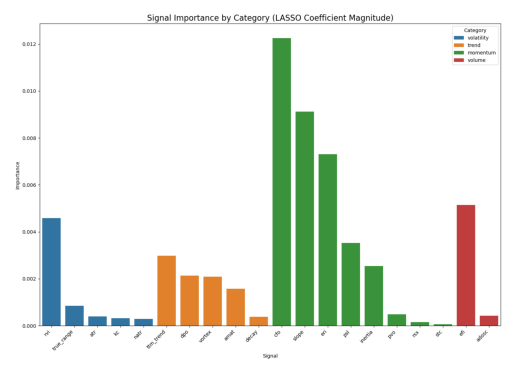

In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("signal_importance_by_category.png")  # Replace "image.png" with your file path
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


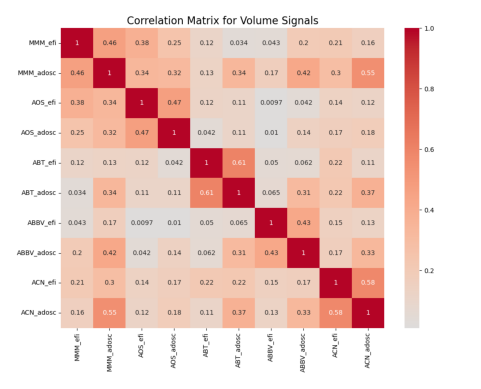

In [122]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("correlation_matrix_volume.png")  # Replace "image.png" with your file path
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


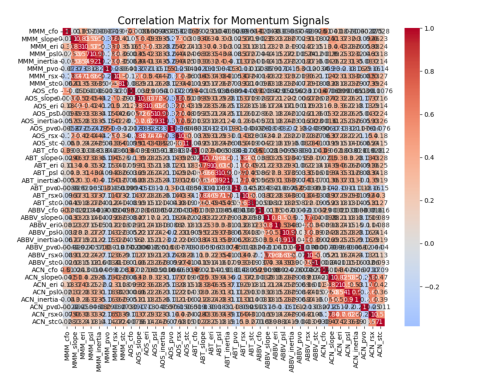

In [124]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("correlation_matrix_momentum.png")  # Replace "image.png" with your file path
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
